In [3]:
install.packages('forecast')
install.packages('TSA')
library(forecast)
library(TSA)

'quadprog', 'fracdiff', 'lmtest', 'tseries', 'urca', 'RcppArmadillo'(들)을 또한 설치합니다.





  There are binary versions available but the source versions are later:
                  binary   source needs_compilation
fracdiff           1.5-2    1.5-3              TRUE
tseries          0.10-53  0.10-58              TRUE
urca               1.3-3    1.3-4              TRUE
RcppArmadillo 0.12.2.0.0 14.0.2-1              TRUE
forecast            8.21   8.23.0              TRUE

  Binaries will be installed
package 'quadprog' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-11\AppData\Local\Temp\Rtmp0qCwTM\downloaded_packages


'leaps', 'locfit'(들)을 또한 설치합니다.





  There are binary versions available but the source versions are later:
        binary   source needs_compilation
leaps      3.1      3.2              TRUE
locfit 1.5-9.7 1.5-9.10              TRUE

  Binaries will be installed
package 'leaps' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-11\AppData\Local\Temp\Rtmp0qCwTM\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


다음의 패키지를 부착합니다: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




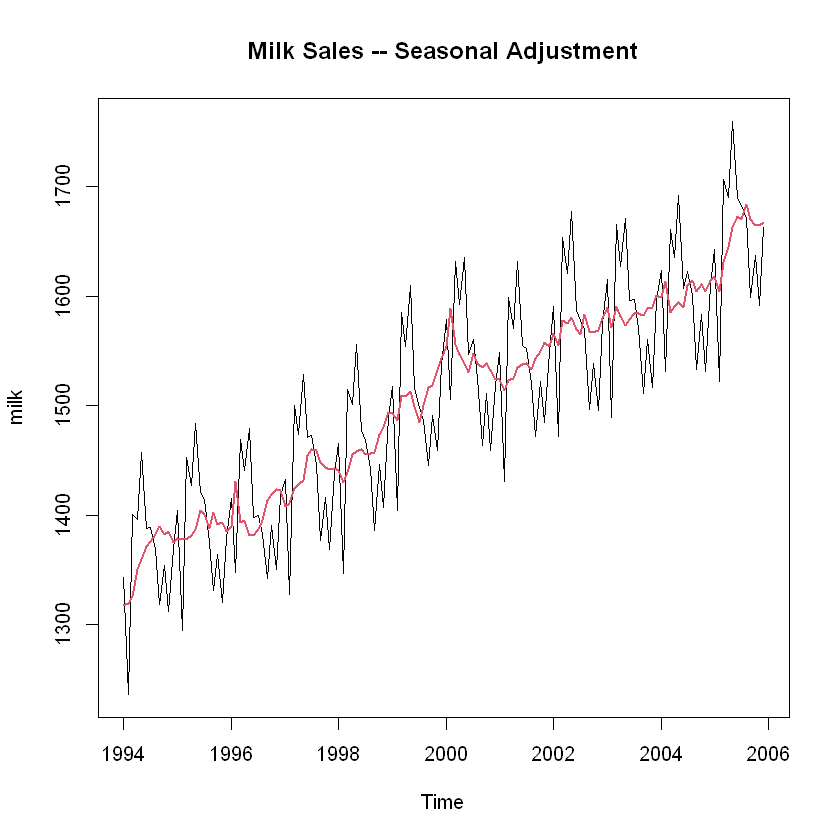

In [5]:
data(milk)
plot(milk, main='Milk Sales -- Seasonal Adjustment')
lines(seasadj(decompose(milk)), col=2, lwd=2)

In [8]:
mm3 <- filter(milk, f=rep(1/3, 3))
mm6 <- filter(milk, f=rep(1/6, 6))
mm12 <- filter(milk, f=rep(1/12, 12))

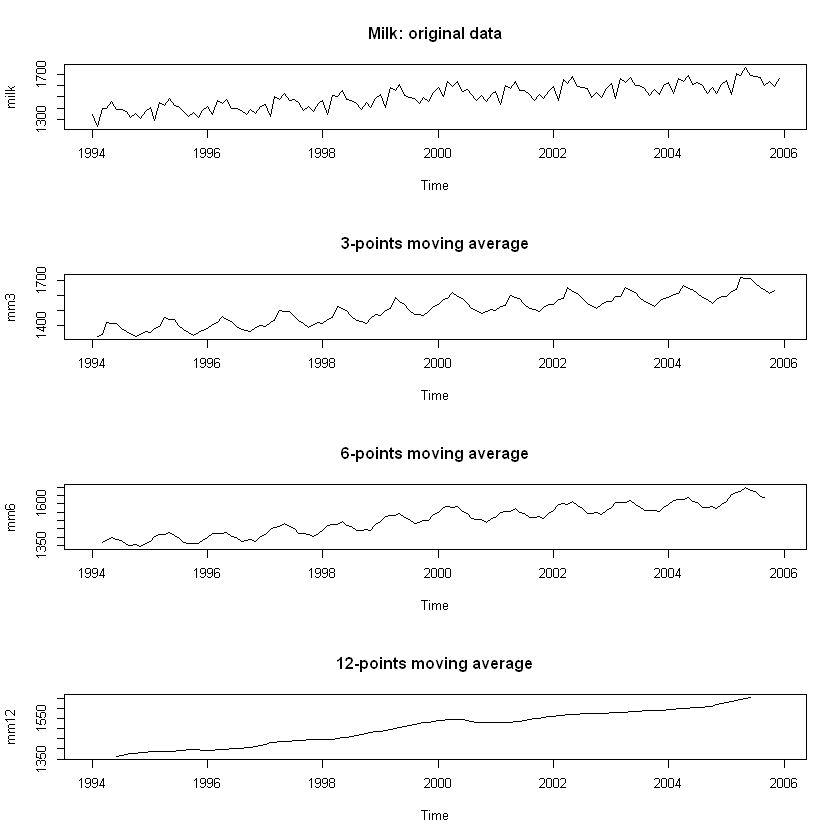

In [9]:
par(mfcol=c(4,1))
plot(milk, main="Milk: original data")
plot(mm3, main="3-points moving average")
plot(mm6, main="6-points moving average")
plot(mm12, main="12-points moving average")

## 이동평균 평활법 4가지

In [10]:
#install.packages('forecast')
library(forecast)

In [ ]:
dd1 <- matrix(c(1342, 1442, 1252, 1343,
                1425, 1362, 1256, 1272,
                  1243, 1359, 1412, 1253,
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))

In [ ]:
dd1.ts <- ts(data=dd1, start=c(2016,1), frequency=4)
dd1.ts


In [ ]:
ff <- filter(dd1.ts, filter=rep(1, 4)/4, method="convolution", sides=1)
#합성곱 필터링 신경망과 같은것

In [ ]:
ff

In [ ]:
plot(dd1.ts, main="Simple Moving Average Smoothing: dd1")
lines(ff, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [ ]:
#진행위치, 시작위치가 조금 밀리게 된다.(이동평활을 하게되면)
#원본 데이터의 특징, 변동특징은 어느정도 유지하면서 줄어드는 것을 알 수 있다

In [ ]:
### Box-Pierce test
* 귀무가설은 독립적이다.
* 대립가설은 자기상관이 있다
* p-value가 0.05보다 크면 독립성 획득, 0.05보다 작으면 자기 상관성 유지

In [ ]:
res <- ff[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


In [ ]:
## 2. 이중 이동평균 평활법 (Double Moving Average Smoothing)


In [ ]:
ff1 <- filter(dd1.ts, filter=rep(1,3)/3, method="convolution", sides=1)
ff2 <- filter(ff1, filter=rep(1,3)/3, method="convolution", sides=1)


In [ ]:
ff1

In [ ]:
ff2

In [ ]:
plot(dd1.ts, main="Double Moving Average Smoothing: dd1")
lines(ff2, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [ ]:
res <- ff2[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)
